In [1]:
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Define the data directories
train_dir = 'C:/GrayScale28X28MaskDataSet/train/'
test_dir = 'C:/GrayScale28X28MaskDataSet/test/'

# Define image size and initialize lists for data and labels
img_size = 28
train_data = []
train_labels = []
test_data = []
test_labels = []

# Function to load images from a directory and preprocess them
def load_images_from_folder(folder_path, label):
    data = []
    labels = []
    for img in os.listdir(folder_path):
        img_array = cv2.imread(os.path.join(folder_path, img), cv2.IMREAD_GRAYSCALE)
        if img_array is not None:
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(label)
    return data, labels

# Load training data
for label, category in enumerate(['with_mask', 'without_mask']):
    path = os.path.join(train_dir, category)
    data, labels = load_images_from_folder(path, label)
    train_data.extend(data)
    train_labels.extend(labels)

# Load testing data
for label, category in enumerate(['with_mask', 'without_mask']):
    path = os.path.join(test_dir, category)
    data, labels = load_images_from_folder(path, label)
    test_data.extend(data)
    test_labels.extend(labels)

# Convert lists to numpy arrays and normalize the data
train_data = np.array(train_data).reshape(-1, img_size, img_size, 1) / 255.0
train_labels = to_categorical(train_labels)
test_data = np.array(test_data).reshape(-1, img_size, img_size, 1) / 255.0
test_labels = to_categorical(test_labels)


In [3]:
#Build the CNN Model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ashik\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#Train the Model
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), batch_size=32)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5609 - loss: 0.6724 - val_accuracy: 0.7423 - val_loss: 0.5743
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7200 - loss: 0.5657 - val_accuracy: 0.8351 - val_loss: 0.3911
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8764 - loss: 0.3518 - val_accuracy: 0.8866 - val_loss: 0.2720
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8833 - loss: 0.2994 - val_accuracy: 0.9433 - val_loss: 0.1848
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9364 - loss: 0.1715 - val_accuracy: 0.9433 - val_loss: 0.1699
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9365 - loss: 0.1503 - val_accuracy: 0.9588 - val_loss: 0.1473
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9510 - loss: 0.1466 - val_accuracy: 0.9433 - val_loss: 0.1587
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9615 - loss: 0.1043 - val_accuracy: 0.9381 - v

In [5]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Predictions and Classification Report
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

print(classification_report(true_labels, predicted_labels))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9496 - loss: 0.2184 
Test Accuracy: 95.36%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.96      0.95      0.95        97

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



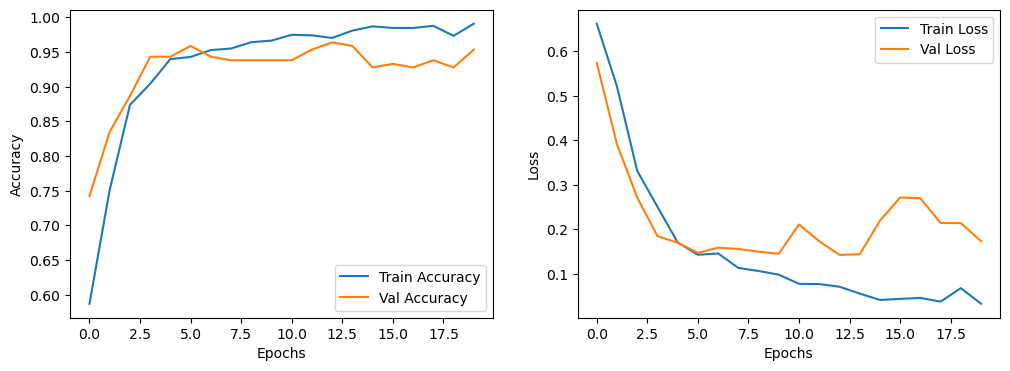

In [6]:
#Plot the training and validation accuracy and loss:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## One model is built above. Let us build few more models to increase the robustness. I have used VGG16-Inspired Model and Xception-Inspired Model below:

In [10]:
# Define the new image size for pretrained models
img_size = 71  # Updated to 32x32

# Initialize data lists for train and test
train_data = []
train_labels = []
test_data = []
test_labels = []

# Function to load and preprocess images
def load_images_from_folder(folder_path, label):
    data = []
    labels = []
    for img in os.listdir(folder_path):
        img_array = cv2.imread(os.path.join(folder_path, img), cv2.IMREAD_COLOR)  # Load in color
        if img_array is not None:
            img_array = cv2.resize(img_array, (img_size, img_size))  # Resize to 32x32
            data.append(img_array)
            labels.append(label)
    return data, labels

# Load training data
for label, category in enumerate(['with_mask', 'without_mask']):
    path = os.path.join(train_dir, category)
    data, labels = load_images_from_folder(path, label)
    train_data.extend(data)
    train_labels.extend(labels)

# Load testing data
for label, category in enumerate(['with_mask', 'without_mask']):
    path = os.path.join(test_dir, category)
    data, labels = load_images_from_folder(path, label)
    test_data.extend(data)
    test_labels.extend(labels)

# Convert lists to numpy arrays and normalize the data
train_data = np.array(train_data).reshape(-1, img_size, img_size, 3) / 255.0  # Updated for RGB
train_labels = to_categorical(train_labels)
test_data = np.array(test_data).reshape(-1, img_size, img_size, 3) / 255.0  # Updated for RGB
test_labels = to_categorical(test_labels)


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# Load the VGG16 model without the top layer (fully connected layers)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the base model
for layer in base_model_vgg16.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model_vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

# Create the VGG16-based model
vgg16_model = Model(inputs=base_model_vgg16.input, outputs=output)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
from tensorflow.keras.applications import Xception

# Load the Xception model without the top layer (fully connected layers)
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the base model
for layer in base_model_xception.layers:
    layer.trainable = False

# Add custom top layers
x = Flatten()(base_model_xception.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

# Create the Xception-based model
xception_model = Model(inputs=base_model_xception.input, outputs=output)

xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [18]:
# Train the VGG16-Inspired Model
history_vgg16 = vgg16_model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), batch_size=32)

# Train the Xception-Inspired Model
history_xception = xception_model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels), batch_size=32)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 809ms/step - accuracy: 0.9919 - loss: 0.0212 - val_accuracy: 0.9588 - val_loss: 0.1358
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 809ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9639 - val_loss: 0.1313
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 770ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9639 - val_loss: 0.1223
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 717ms/step - accuracy: 0.9925 - loss: 0.0180 - val_accuracy: 0.9742 - val_loss: 0.1023
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 32s 766ms/step - accuracy: 0.9961 - loss: 0.0086 - val_accuracy: 0.9639 - val_loss: 0.1228
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 720ms/step - accuracy: 0.9968 - loss: 0.0089 - val_accuracy: 0.9691 - val_loss: 0.1180
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 713ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9691 - val_loss: 0.1237
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 784ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accu

## Evaluate Using Built-in Keras Functions: 

In [19]:
# Evaluate VGG16 model
test_loss_vgg16, test_accuracy_vgg16 = vgg16_model.evaluate(test_data, test_labels)
print(f'VGG16 Model Test Loss: {test_loss_vgg16:.4f}')
print(f'VGG16 Model Test Accuracy: {test_accuracy_vgg16 * 100:.2f}%')

# Evaluate Xception model
test_loss_xception, test_accuracy_xception = xception_model.evaluate(test_data, test_labels)
print(f'Xception Model Test Loss: {test_loss_xception:.4f}')
print(f'Xception Model Test Accuracy: {test_accuracy_xception * 100:.2f}%')


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.9622 - loss: 0.1611
VGG16 Model Test Loss: 0.1488
VGG16 Model Test Accuracy: 96.39%
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 393ms/step - accuracy: 0.9651 - loss: 0.0996
Xception Model Test Loss: 0.0944
Xception Model Test Accuracy: 96.39%


## Generate Predictions and Confusion Matrix: 
You can generate predictions on the test set and then compute a confusion matrix to visualize the performance of your models across all classes:

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 391ms/step


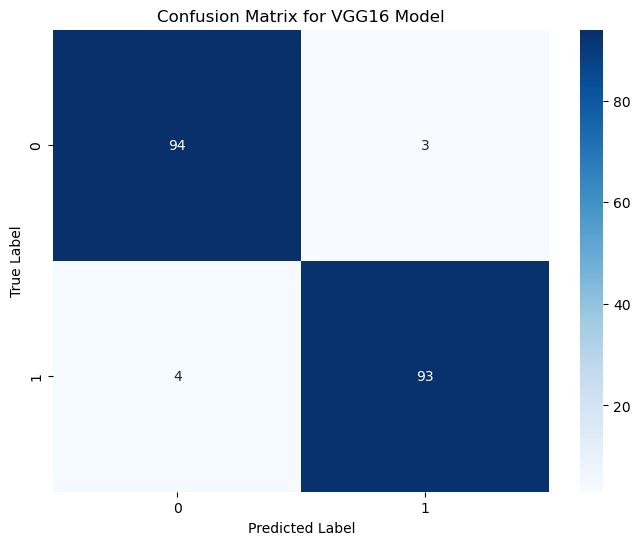

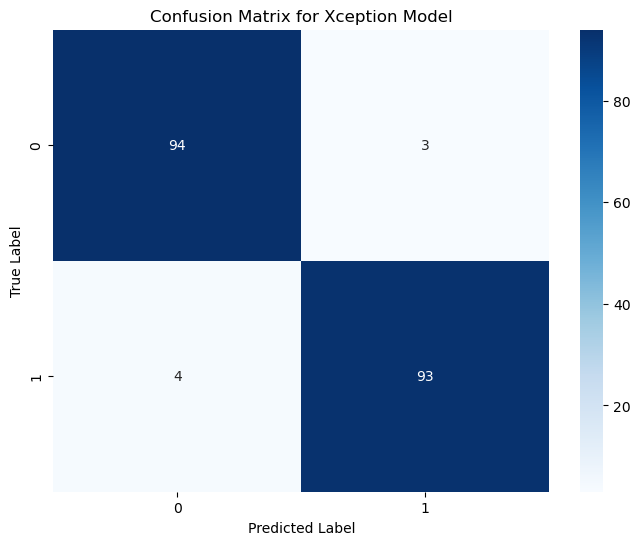

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test data
predictions_vgg16 = vgg16_model.predict(test_data)
predicted_labels_vgg16 = np.argmax(predictions_vgg16, axis=1)
true_labels = np.argmax(test_labels, axis=1)

predictions_xception = xception_model.predict(test_data)
predicted_labels_xception = np.argmax(predictions_xception, axis=1)

# Compute confusion matrix for VGG16
cm_vgg16 = confusion_matrix(true_labels, predicted_labels_vgg16)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VGG16 Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute confusion matrix for Xception
cm_xception = confusion_matrix(true_labels, predicted_labels_xception)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xception, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Xception Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Classification Report:
Generate a classification report to get a detailed breakdown of precision, recall, and F1-score for each class:

In [21]:
# Classification report for VGG16 model
print('Classification Report for VGG16 Model:')
print(classification_report(true_labels, predicted_labels_vgg16, target_names=['WithMask', 'WithoutMask']))

# Classification report for Xception model
print('Classification Report for Xception Model:')
print(classification_report(true_labels, predicted_labels_xception, target_names=['WithMask', 'WithoutMask']))


Classification Report for VGG16 Model:
              precision    recall  f1-score   support

    WithMask       0.96      0.97      0.96        97
 WithoutMask       0.97      0.96      0.96        97

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194

Classification Report for Xception Model:
              precision    recall  f1-score   support

    WithMask       0.96      0.97      0.96        97
 WithoutMask       0.97      0.96      0.96        97

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



## Visualizing Model Performance: 
Plotting the training and validation accuracy and loss over epochs can also help in understanding how well the model generalizes to unseen data:

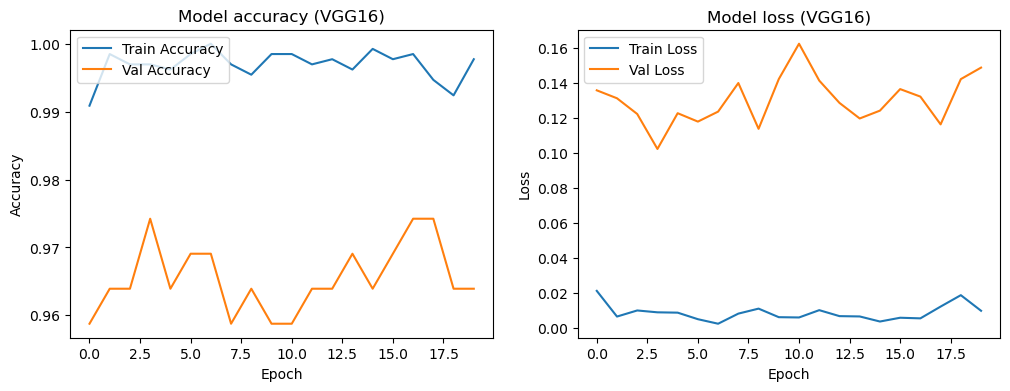

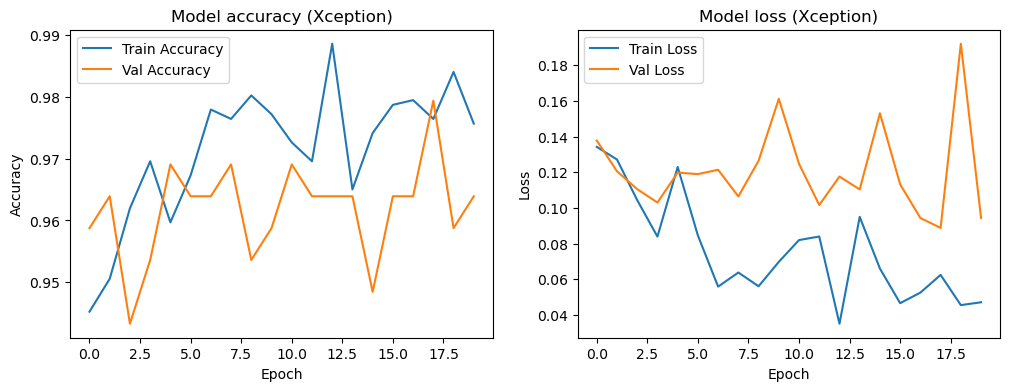

In [22]:
# Plot training & validation accuracy values for VGG16
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Accuracy')
plt.title('Model accuracy (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values for VGG16
plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('Model loss (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Repeat the plotting process for the Xception model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_xception.history['accuracy'], label='Train Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Val Accuracy')
plt.title('Model accuracy (Xception)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_xception.history['loss'], label='Train Loss')
plt.plot(history_xception.history['val_loss'], label='Val Loss')
plt.title('Model loss (Xception)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()
